<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/insurance_Overall_flow_LR_Sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('isurance_pred_regression.csv')

In [ ]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [ ]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
dtype: object

# Data type conversion:

In [ ]:
df

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1


In [ ]:
df = pd.get_dummies(df,columns=['sourcing_channel','residence_area_type'],drop_first=True)

# Checking column > 90% NaN & rows > 50% NaN

In [ ]:
df.loc[:,df.columns[df.isnull().sum() / df.shape[0] < 0.9 ]].shape


(79853, 16)

In [ ]:
# No column having >90% NAN values
df.loc[:,df.columns[(df.isnull().sum()) / (df.shape[0]) < 0.9 ]].shape


(79853, 16)

In [ ]:
df[df.isnull().sum(axis=1) <=(df.shape[1] * 0.5) ].shape

(79853, 16)

# Filling missing values if any

In [ ]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
premium                                0
target                                 0
sourcing_channel_B                     0
sourcing_channel_C                     0
sourcing_channel_D                     0
sourcing_channel_E                     0
residence_area_type_Urban              0
dtype: int64

In [ ]:
df['application_underwriting_score'].describe()

count    76879.000000
mean        99.067291
std          0.739799
min         91.900000
25%         98.810000
50%         99.210000
75%         99.540000
max         99.890000
Name: application_underwriting_score, dtype: float64

In [ ]:
df['Count_3-6_months_late'].fillna(df['Count_3-6_months_late'].mode()[0],inplace=True)
df['Count_6-12_months_late'].fillna(df['Count_6-12_months_late'].mode()[0],inplace=True)
df['Count_more_than_12_months_late'].fillna(df['Count_more_than_12_months_late'].mode()[0],inplace=True)
df['application_underwriting_score'].fillna(df['application_underwriting_score'].median(),inplace=True)

In [ ]:
df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
target                              0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Urban           0
dtype: int64

#Checking columns having all same values/ all different values

In [ ]:
(df == df.iloc[0]).all()

id                                  False
perc_premium_paid_by_cash_credit    False
age_in_days                         False
Income                              False
Count_3-6_months_late               False
Count_6-12_months_late              False
Count_more_than_12_months_late      False
application_underwriting_score      False
no_of_premiums_paid                 False
premium                             False
target                              False
sourcing_channel_B                  False
sourcing_channel_C                  False
sourcing_channel_D                  False
sourcing_channel_E                  False
residence_area_type_Urban           False
dtype: bool

In [ ]:
df.shape

(79853, 16)

In [ ]:
for col in df.columns:
    if len(df[col].unique()) == df.shape[0]:
        print("col", col)
        df.drop(col,inplace=True,axis=1)

col id


In [ ]:
df.shape

(79853, 15)

#Check the count of duplicate records and remove duplicate records

In [ ]:
df.duplicated().any().sum()
#df.drop_duplicates(inplace = True)

0

In [ ]:
df.shape

(79853, 15)

# Splitting data into train test

In [ ]:

x = df.loc[:, ~df.columns.isin(['target'])]
y = df.loc[:,'target']

#We can do FS by different methods like LASO/RIDGE/ENTROPY

In [ ]:
from sklearn.model_selection import train_test_split
#train_test_split() to split the dataset into train and test set at random.
#test size data set should be 30% data
X_train,X_test,Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=42)
#Creating an linear regression model object
#model = LinearRegression()
#Training the model using training data set
#model.fit(X_train, Y_train) 
#X_train_predict = model.predict(X_train)
#X_test_predict = model.predict(X_test)

In [ ]:
X_train.shape,X_test.shape

((55897, 14), (23956, 14))

In [ ]:
Y_train

61663    1
41631    1
16230    1
72881    1
74337    0
        ..
6265     1
54886    1
76820    1
860      1
15795    1
Name: target, Length: 55897, dtype: int64

In [ ]:
Y_train.shape, Y_test.shape

((55897,), (23956,))

# Seperate Normalization on train/test data

In [ ]:
#from sklearn import preprocessing
#Normalise training data
#x = X_train.values #returns a numpy array
#StandardScaler = preprocessing.StandardScaler()
#normalized_train_X = StandardScaler.fit_transform(X_train)
#normalized_train_X = pd.DataFrame(normalized_train_X,columns=X_train.columns)
#normalized_train_X



In [ ]:
#Normalise testing data
#x = X_test.values #returns a numpy array
#normalized_test_X = StandardScaler.fit_transform(X_test)
#normalized_test_X = pd.DataFrame(normalized_test_X,columns=X_test.columns)
#normalized_test_X

# Comparing mean and median for outliers

In [ ]:
df.corr()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
perc_premium_paid_by_cash_credit,1.000000,-0.259131,-0.031868,0.213011,0.213953,0.167213,-0.138308,-0.152837,-0.067523,-0.241064,0.019778,0.045189,0.046534,0.014512,-0.001562
age_in_days,-0.259131,1.000000,0.029308,-0.057874,-0.072439,-0.059114,0.049582,0.176544,0.074070,0.095158,0.011423,-0.151481,-0.130678,-0.030726,0.000684
Income,-0.031868,0.029308,1.000000,-0.001296,-0.017292,-0.012341,0.062612,0.079078,0.302825,0.016542,0.015270,0.024703,0.039225,0.013132,0.003392
Count_3-6_months_late,0.213011,-0.057874,-0.001296,1.000000,0.204286,0.296139,-0.083875,0.076435,-0.000819,-0.246427,0.018655,0.031645,0.034018,0.004946,0.001513
Count_6-12_months_late,0.213953,-0.072439,-0.017292,0.204286,1.000000,0.266337,0.005090,-0.092593,-0.043642,-0.283998,0.008613,0.009052,0.020954,0.002125,-0.000809
Count_more_than_12_months_late,0.167213,-0.059114,-0.012341,0.296139,0.266337,1.000000,-0.032233,-0.021409,-0.023462,-0.238450,0.008364,0.016211,0.017141,0.002077,-0.001219
application_underwriting_score,-0.138308,0.049582,0.062612,-0.083875,0.005090,-0.032233,1.000000,-0.269273,0.131042,0.067129,-0.008912,-0.051834,-0.013983,-0.000277,0.005141
no_of_premiums_paid,-0.152837,0.176544,0.079078,0.076435,-0.092593,-0.021409,-0.269273,1.000000,0.191889,0.022741,0.039574,0.021251,0.011755,0.004145,0.003447
premium,-0.067523,0.074070,0.302825,-0.000819,-0.043642,-0.023462,0.131042,0.191889,1.000000,0.036420,0.036599,0.064379,0.083873,0.036559,0.031453
target,-0.241064,0.095158,0.016542,-0.246427,-0.283998,-0.238450,0.067129,0.022741,0.036420,1.000000,-0.004124,-0.021574,-0.028393,-0.004680,0.001625


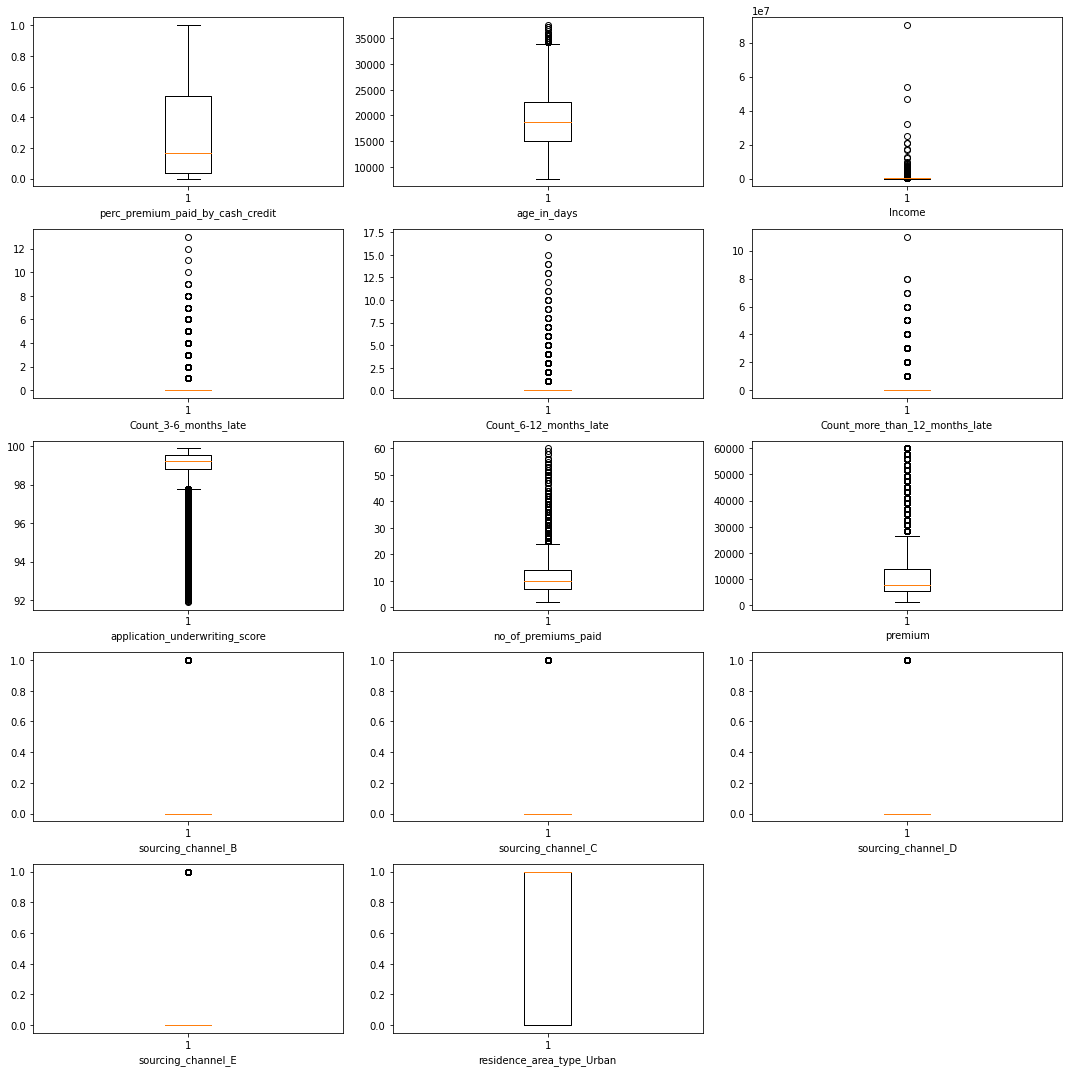

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(X_train.columns,1):  
    plt.subplot(5,3, i)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.tight_layout()

In [ ]:
Y_train

61663    1
41631    1
16230    1
72881    1
74337    0
        ..
6265     1
54886    1
76820    1
860      1
15795    1
Name: target, Length: 55897, dtype: int64

In [ ]:
def impute_outliers(X_train,Y_train):
    for col in X_train.columns:
        min_l, max_l = calc_limits_IQR(X_train,col)
        
        X_train.loc[X_train[col] > max_l, col] = max_l
        X_train.loc[X_train[col] < min_l, col] = min_l
      
    Y_train.loc[Y_train > max_l] = max_l
    Y_train.loc[Y_train < min_l] = min_l
    return X_train,Y_train

In [ ]:
X_train_impute,Y_train_impute = impute_outliers(X_train.copy(),Y_train.copy())

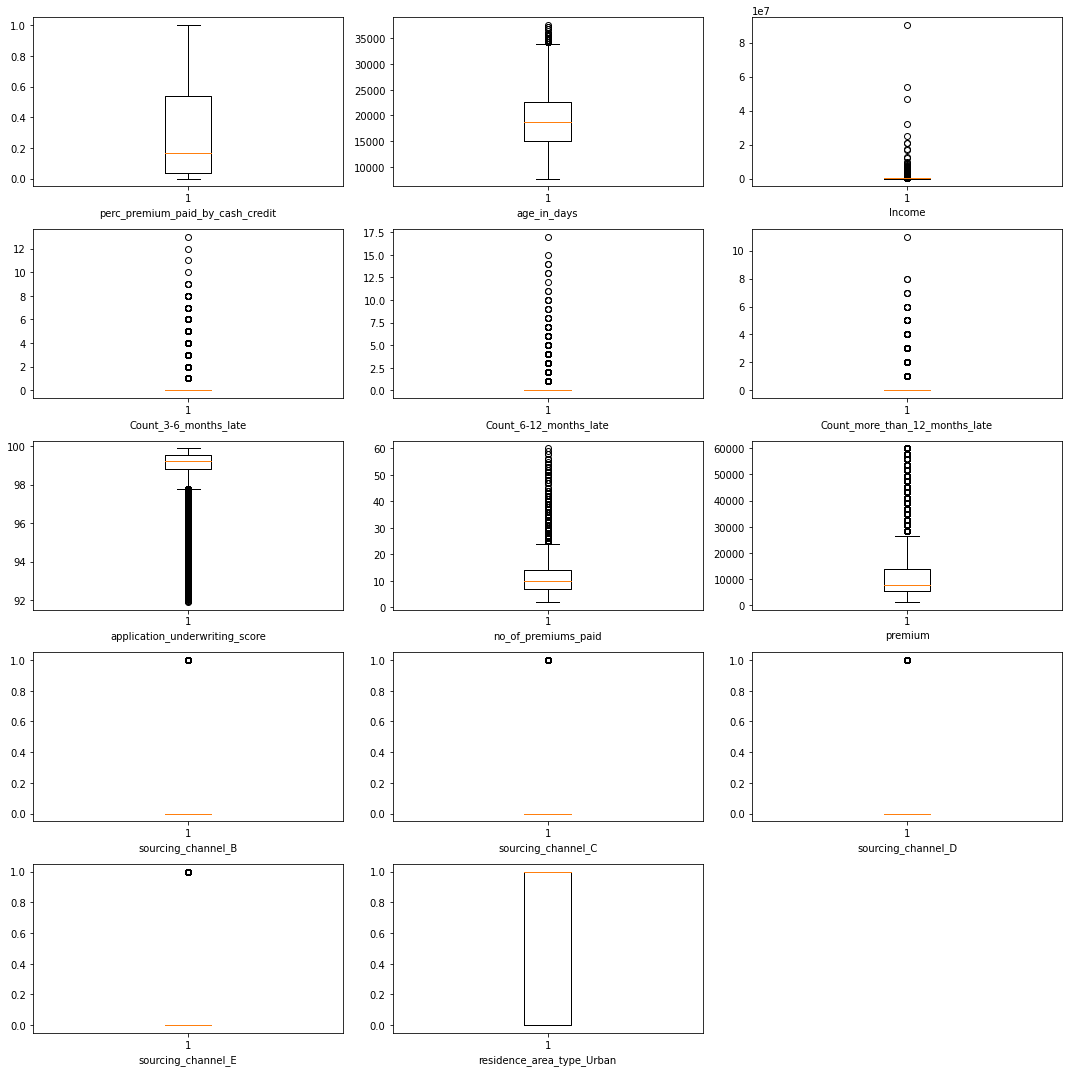

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(X_train.columns,1):  
    plt.subplot(5,3, i)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.tight_layout()

# Feature selection by using proper method according to the data

##Using Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train, Y_train)
lasso.coef_


array([-2.26731388e-02,  2.98302975e-06,  1.87746801e-09, -4.87765312e-02,
       -8.01207122e-02, -4.46825057e-03,  0.00000000e+00, -0.00000000e+00,
        4.96975172e-07, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00])

In [ ]:
len(lasso.coef_[abs(lasso.coef_)>0])

7

In [ ]:
feature_selected = pd.DataFrame(X_train,columns=X_train.columns[abs(lasso.coef_)>0])

In [ ]:
feature_selected.columns

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'premium'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [ ]:
coeff_used

3

##Using Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'entropy')
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_dt.feature_importances_

array([0.17793607, 0.15785292, 0.16492502, 0.03928322, 0.10647376,
       0.02190554, 0.12894948, 0.07996512, 0.06695188, 0.01335178,
       0.01329213, 0.00961392, 0.00226726, 0.0172319 ])

In [ ]:
m = max(model_dt.feature_importances_)
for imp, col in zip(model_dt.feature_importances_,X_train.columns):
    print(col,"                        ", imp/m*100)

perc_premium_paid_by_cash_credit                          100.0
age_in_days                          88.7132830041946
Income                          92.68779987210911
Count_3-6_months_late                          22.077155743502818
Count_6-12_months_late                          59.838210436178954
Count_more_than_12_months_late                          12.310904264960671
application_underwriting_score                          72.46955689984372
no_of_premiums_paid                          44.9403675473768
premium                          37.62693251159806
sourcing_channel_B                          7.503695089229049
sourcing_channel_C                          7.470170960364526
sourcing_channel_D                          5.403017551344414
sourcing_channel_E                          1.2741995371941555
residence_area_type_Urban                          9.684321162964668


In [ ]:
len(model_dt.feature_importances_[abs(model_dt.feature_importances_)>0.040])

7

In [ ]:
feature_selected_entropy = pd.DataFrame(X_train,columns=X_train.columns[abs(model_dt.feature_importances_)>0.040])

In [ ]:
feature_selected_entropy

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_6-12_months_late,application_underwriting_score,no_of_premiums_paid,premium
61663,0.329,23373,82600,0.0,99.13,10,1200
41631,0.024,27020,750120,0.0,99.75,6,11700
16230,0.692,17170,90080,0.0,98.93,6,1200
72881,0.122,24465,25750,0.0,94.70,7,1200
74337,1.000,18620,122730,2.0,99.22,9,5400
...,...,...,...,...,...,...,...
6265,0.281,11689,187640,0.0,98.48,10,3300
54886,0.408,14610,202280,0.0,98.45,19,11700
76820,0.066,18265,270040,0.0,98.90,12,18000
860,0.420,12420,122610,0.0,98.91,11,5400


# Linear Regression 

In [ ]:
a = df[['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'premium']]
b = df['target']

In [ ]:
X_train,X_test,Y_train, Y_test = train_test_split(a,b,test_size=0.3,random_state=42)


In [ ]:
from sklearn import preprocessing
#Normalise training data
x = X_train.values #returns a numpy array
StandardScaler = preprocessing.StandardScaler()
normalized_train_X = StandardScaler.fit_transform(X_train)
normalized_train_X = pd.DataFrame(normalized_train_X,columns=X_train.columns)
normalized_train_X


,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,premium
0,0.047311,0.875211,-0.229813,-0.356927,-0.178947,-0.191357,-1.035577
1,-0.864991,1.576422,0.981632,-0.356927,-0.178947,-0.191357,0.082971
2,1.133100,-0.317445,-0.216238,-0.356927,-0.178947,-0.191357,-1.035577
3,-0.571858,1.085170,-0.332987,-0.356927,-0.178947,-0.191357,-1.035577
4,2.054376,-0.038652,-0.156983,-0.356927,4.433740,-0.191357,-0.588158
...,...,...,...,...,...,...,...
55892,-0.096264,-1.371280,-0.039182,-0.356927,-0.178947,-0.191357,-0.811867
55893,0.283612,-0.809658,-0.012613,-0.356927,-0.178947,-0.191357,0.082971
55894,-0.739363,-0.106908,0.110361,-0.356927,-0.178947,-0.191357,0.754101
55895,0.319506,-1.230731,-0.157201,-0.356927,-0.178947,-0.191357,-0.588158


In [ ]:
#Normalise testing data
x = X_test.values #returns a numpy array
normalized_test_X = StandardScaler.fit_transform(X_test)
normalized_test_X = pd.DataFrame(normalized_test_X,columns=X_test.columns)
normalized_test_X

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,premium
0,-0.570554,-0.403665,-0.081152,-0.365091,-0.179185,-0.194516,0.303926
1,-0.879821,0.855020,-0.118249,-0.365091,-0.179185,-0.194516,-0.363783
2,-0.844137,0.574313,-0.312815,-0.365091,-0.179185,-0.194516,-0.363783
3,-0.505132,-1.032625,0.185442,-0.365091,-0.179185,-0.194516,1.416774
4,2.031452,-1.519605,-0.465418,-0.365091,-0.179185,-0.194516,-0.808922
...,...,...,...,...,...,...,...
23951,1.882766,0.434438,-0.326052,1.055656,-0.179185,-0.194516,-0.586352
23952,-0.585423,0.574505,-0.091717,-0.365091,-0.179185,-0.194516,-0.363783
23953,-0.942269,0.504854,-0.134869,1.055656,-0.179185,-0.194516,0.526496
23954,-0.734109,0.155262,0.531660,-0.365091,-0.179185,-0.194516,0.526496


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
model = LinearRegression()
model.fit(normalized_train_X,Y_train)
train_predict = model.predict(normalized_train_X)
test_predict = model.predict(normalized_test_X)
print("MSE")
print("Train : ",mean_squared_error(Y_train,train_predict))
print("Test  : ",mean_squared_error(Y_test,test_predict))

MSE
Train :  0.0493898984687832
Test  :  0.05015189395100495


In [ ]:
#Train and predict the Y_train for the feature "premium"
premium_model = LinearRegression()
premium_model.fit(normalized_train_X[['premium']], Y_train)
premium_predictd = premium_model.predict(normalized_train_X[['premium']])
test_predict = model.predict(normalized_test_X)


print("Train : ",mean_squared_error(Y_train,premium_predictd))
print("Test  : ",mean_squared_error(Y_test,test_predict))
#premium_df = pd.DataFrame(list(zip(Y_train, premium_predictd)), columns = ['Actual premium','Predicted premium'])
#premium_df.head()

Train :  0.05796569071890223
Test  :  0.05015189395100495


In [ ]:
Y_train.index

Int64Index([61663, 41631, 16230, 72881, 74337, 47973, 55748, 46927,  1005,
            60850,
            ...
            41090, 16023, 60263, 44131, 37194,  6265, 54886, 76820,   860,
            15795],
           dtype='int64', length=55897)

In [ ]:
df['premium']

0         3300
1        18000
2         3300
3         9600
4         9600
         ...  
79848    13800
79849    28500
79850     9600
79851     5700
79852     9600
Name: premium, Length: 79853, dtype: int64

In [ ]:
print("Intercept value:", model.intercept_)
print("Coefficient values:", model.coef_)

Intercept value: 3.637978807091713e-12
Coefficient values: [-4.79671769e-13  1.31838984e-16 -1.38777878e-17 -2.65393135e-13
 -1.78576000e-13 -8.92836166e-14  1.00000000e+00]


In [ ]:
coef_df = pd.DataFrame(list(zip(X_train.columns,model.coef_)), columns = ['Features','Predicted Coeff'])
coef_df
#print("Features train data:\n",X_train.smoker)

,Features,Predicted Coeff
0,perc_premium_paid_by_cash_credit,-4.796718e-13
1,age_in_days,1.318390e-16
2,Income,-1.387779e-17
3,Count_3-6_months_late,-2.653931e-13
4,Count_6-12_months_late,-1.785760e-13
5,Count_more_than_12_months_late,-8.928362e-14
6,application_underwriting_score,1.000000e+00


In [ ]:
Y_train_predict = model.predict(X_train)
Y_train_predict[0:5]
Y_test_predict = model.predict(X_test)

ValueError: ignored

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#np.sqrt(mean_squared_error(Y_train, Y_train_predict))
#MSE for Train data set
print("MSE:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("MSE only for Smoker:", np.sqrt(mean_squared_error(Y_train,smoker_model.predict(X_train[['smoker_yes']]))))

In [ ]:
#MSE for Test data set
print("MSE:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print("MSE only for Smoker:", np.sqrt(mean_squared_error(Y_test,smoker_model.predict(X_test[['smoker_yes']]))))